<a href="https://colab.research.google.com/github/PavankumarUppar/DLL/blob/main/Program5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install tensorflow yfinance pandas numpy

[*********************100%%**********************]  1 of 1 completed


Epoch 1/50
6/6 [==============================] - 6s 154ms/step - loss: 0.4352 - val_loss: 0.0897
Epoch 2/50
6/6 [==============================] - 0s 46ms/step - loss: 0.3242 - val_loss: 0.0599
Epoch 3/50
6/6 [==============================] - 0s 32ms/step - loss: 0.2589 - val_loss: 0.0379
Epoch 4/50
6/6 [==============================] - 0s 31ms/step - loss: 0.1888 - val_loss: 0.0208
Epoch 5/50
6/6 [==============================] - 0s 21ms/step - loss: 0.1277 - val_loss: 0.0091
Epoch 6/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0878 - val_loss: 0.0037
Epoch 7/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0521 - val_loss: 0.0065
Epoch 8/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0335 - val_loss: 0.0184
Epoch 9/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0293 - val_loss: 0.0323
Epoch 10/50
6/6 [==============================] - 0s 45ms/step - loss: 0.0257 - val_loss: 0.0297
Epoch 11/50
6/6 [===========

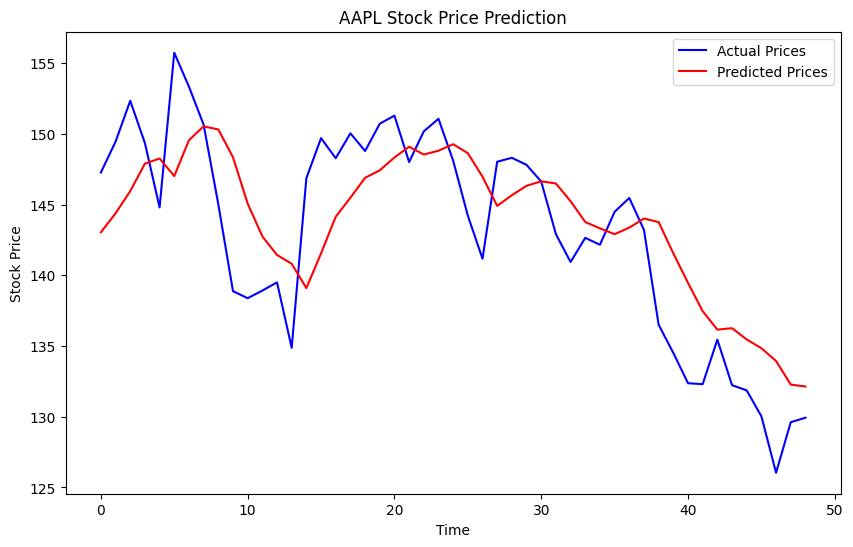

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Function to fetch historical stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to preprocess stock data
def preprocess_data(stock_data):
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Extracting the closing prices
    closing_prices = stock_data['Close'].values.reshape(-1, 1)

    # Scaling the closing prices
    scaled_prices = scaler.fit_transform(closing_prices)

    return scaled_prices, scaler

# Function to create sequences for training the GRU model
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = data[i+sequence_length:i+sequence_length+1]
        sequences.append((seq, label))
    return np.array([s[0] for s in sequences]), np.array([s[1] for s in sequences])

# Function to build the GRU model
def build_gru_model(sequence_length, input_dim=1):
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=(sequence_length, input_dim)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to plot actual vs predicted prices
def plot_predictions(actual, predicted, ticker):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual Prices', color='blue')
    plt.plot(predicted, label='Predicted Prices', color='red')
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main function
def main():
    ticker = 'AAPL'
    start_date = '2022-01-01'
    end_date = '2023-01-01'
    sequence_length = 10  # Number of previous days to consider for prediction

    # Fetch historical stock data
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    # Preprocess the data
    scaled_prices, scaler = preprocess_data(stock_data)

    # Create sequences for training the model
    X, y = create_sequences(scaled_prices, sequence_length)

    # Split the data into training and testing sets
    split_ratio = 0.8
    split_index = int(len(X) * split_ratio)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Reshape the data for GRU input
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build and train the GRU model
    model = build_gru_model(sequence_length)
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Inverse transform the predicted and actual prices to original scale
    predicted_prices = scaler.inverse_transform(predictions)
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot the results
    plot_predictions(actual_prices, predicted_prices, ticker)

if __name__ == "__main__":
    main()
